In [1]:
pip install ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.5 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273786 sha256=c496b743f6d902daf8b1e6fa0cf4a2c6238a7c902c063362bd40130bb0e26ece
  Stored in directory: /home/satamap2/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from ete3 import Tree

In [3]:
def read_phylogenetic_tree(path: str) -> list[str]:
    with open(path, "r") as f:
        tree_str = f.read()
    return [x.replace("\n", "") + ";" for x in tree_str.split(";")][:-1]

newick_strings = read_phylogenetic_tree("./newick.tre")
newick_strings[0:3]

['(Atrichantha_elsiae,(Atrichantha_gemmifera,Calotesta_alba,(Metalasia_oligocephala,(Metalasia_bodkinii,(Metalasia_humilis,(Metalasia_quinqueflora,Metalasia_lichtensteinii,((Metalasia_tenuis,Metalasia_tenuifolia),(Metalasia_phillipsii,(((Metalasia_serrata,Metalasia_cymbifolia),Metalasia_seriphiifolia,Metalasia_erubescens),((((Metalasia_serrulata,Metalasia_rogersii),Metalasia_albescens),Metalasia_juniperoides),(Metalasia_rhoderoides,Metalasia_confusa,Metalasia_riparia),(Metalasia_compacta,((((Metalasia_agathosmoides,Metalasia_fastigiata),Metalasia_adunca),Metalasia_capitata),((Metalasia_brevifolia,Metalasia_densa),(Metalasia_muraltiifolia,(Metalasia_pulchella,(Metalasia_cephalotes,(Metalasia_divergens,Metalasia_inversa)))))))))))))))Metalasia));',
 '(Poaceae,(((Apiaceae,Asteraceae),(((Brassicaceae,Fabaceae),Solanaceae),Caprifoliaceae)),(Chenopodiaceae,Polygonaceae)));',
 '(Poaceae,((((Apiaceae,Asteraceae),Caprifoliaceae),((Brassicaceae,Fabaceae),Solanaceae)),(Chenopodiaceae,Polygonaceae

# Newick Strings
### 1. Write a Python script to extract the phylogenetic trees into a graph representation

In [28]:
def parse_newick(s, pos=0, parent=None, G=None):
    
    if G is None:
        G = nx.Graph()
    
    name = ''
    while pos < len(s) and s[pos] not in ['(', ',', ')', ';']:
        name += s[pos]
        pos += 1
        
    current_node = name or str(G.number_of_nodes())
    G.add_node(current_node)
    
    if parent is not None:
        G.add_edge(parent, current_node)
    
    
    if pos < len(s) and s[pos] == '(':
        pos += 1
        while s[pos] != ')':
            pos = parse_newick(s, pos, current_node, G)
            if s[pos] == ',':
                pos += 1
        pos += 1
        
    return pos

def draw_tree(G):
    pos = nx.spring_layout(G, seed=17)
    nx.draw(G, pos, with_labels=True)#, arrows=True)
    plt.show()


(Poaceae,(((Apiaceae,Asteraceae),(((Brassicaceae,Fabaceae),Solanaceae),Caprifoliaceae)),(Chenopodiaceae,Polygonaceae)));


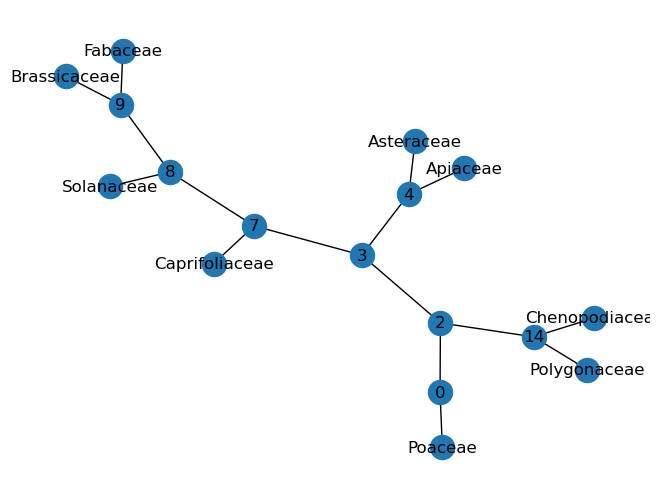

In [29]:
G = nx.Graph()
print(newick_strings[1])
parse_newick(newick_strings[1], 0, None, G)
draw_tree(G)

In [6]:
t = Tree(newick_strings[7])
print(t)


   /-Poaceae
  |
--|      /-Apiaceae
  |   /-|
  |  |   \-Chenopodiaceae
   \-|
     |      /-Brassicaceae
     |   /-|
      \-|   \-Fabaceae
        |
         \-Caprifoliaceae


### The amount of phylogenetic trees:

In [7]:
len(newick_strings)

100

### The amount of rooted trees:

In [8]:
rooted_trees = 0
for tree in newick_strings:
    
    t = Tree(tree, format=8)
    
    for node in t.traverse():
        if len(node.children) <= 2:
            rooted_trees += 1
            
        break

rooted_trees

93

# Enewick Strings

### 1. Write a Python script to extract the phylogenetic networks into a graph representation

In [218]:
def read_phylogenetic_tree_enewick(path: str) -> list[str]:
    with open(path, "r") as f:
        tree_str = f.read()
    return [x.replace("\n", "") + ";" for x in tree_str.split(";")][:-1]

enewick_strings = read_phylogenetic_tree("./enewick.tre")
enewick_strings

['(#1,((((2,3),1))#1,4));',
 '((#1,4),((1)#1,(2,3)));',
 '((#1,4),(((3)#1,2),1));',
 '((#1,4),(((2,3))#1,1));',
 '((#1,4),(((2)#1,3),1));',
 '((#1,((1)#1,4)),(2,3));',
 '(((#1,4),1),((3)#1,2));',
 '(#1,((((2,3))#1,4),1));',
 '(((#1,4),1),((2)#1,3));',
 '(#1,((((1)#1,4),3),2));',
 '(((#1,((3)#1,4)),2),1);',
 '((#1,(((2)#1,4),3)),1);',
 '(#1,(((1)#1,4),(2,3)));',
 '(((#1,4),((3)#1,2)),1);',
 '((#1,(((2,3))#1,4)),1);',
 '(((#1,4),((2)#1,3)),1);',
 '(#1,((((1)#1,4),2),3));',
 '((#1,(((3)#1,4),2)),1);',
 '(((#1,((2)#1,4)),3),1);',
 '(#1,(((#2,(2,3)))#1,((1)#2,4)));',
 '(#1,((((#2,2),1))#1,((3)#2,4)));',
 '(#1,(((#2,1))#1,(((2,3))#2,4)));',
 '(#1,((((#2,3),1))#1,((2)#2,4)));',
 '(#2,(#1,((((1)#1,(2,3)))#2,4)));',
 '((#1,(#2,4)),(((3)#2,2),(1)#1));',
 '((#1,(#2,4)),(((2)#2,3),(1)#1));',
 '(#2,(#1,(((((3)#1,2),1))#2,4)));',
 '((#1,(#2,4)),(((3)#1,2),(1)#2));',
 '((#1,(#2,4)),((((3)#1,2))#2,1));',
 '(#2,(#1,(((((2,3))#1,1))#2,4)));',
 '((#1,(#2,4)),((((3)#2,2))#1,1));',
 '((#1,(#2,4)),((((2)#2,

In [215]:
def parse_enewick(s, pos=0, parent=None, G=None):
    
    if G is None:
        G = nx.Graph()
    
    # Initialize an empty string to collect the node name
    name = ''
    while pos < len(s) and s[pos] not in ['(', ',', ')', ';']:
        name += s[pos]
        pos += 1
        
    if name:
        current_node = name
        if name not in G.nodes:
            # Add the named node if it doesn't exist in graph
            G.add_node(name)
    else:
        # name internal nodes with 'i' prefix to avoid conflicts
        current_node = 'i' + str(G.number_of_nodes())
        
        G.add_node(current_node)
    
    if parent is not None:
        G.add_edge(parent, current_node)

    if pos < len(s) and s[pos] == '(':
        pos += 1
        while s[pos] != ')':
            pos = parse_enewick(s, pos, current_node, G)
            if s[pos] == ',':
                pos += 1
        pos += 1
    
    # If the current position is a '#', it is a hybrid node
    if pos < len(s) and s[pos] == '#':
        pos += 1
        hybrid_name = '#'
        while s[pos] not in ['(', ',', ')', ';']:
            hybrid_name += s[pos]
            pos += 1
            
            # Create the hybrid node and add it to the graph
            hybrid_node = hybrid_name
            G.add_node(hybrid_name)
            G.add_edge(current_node, hybrid_node)

    return pos

((#1,4),(((2)#1,3),1));


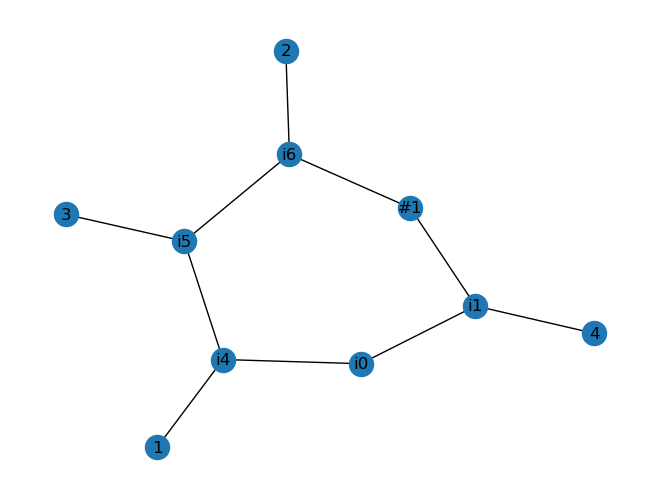

AttributeError: 'Graph' object has no attribute 'get_root'

In [222]:
G = nx.Graph()
print(enewick_strings[4])
parse_enewick(enewick_strings[4], 0, None, G)
draw_tree(G)
G.get_root()

### The amount of phylogenetic networks:

In [213]:
len(enewick_strings)

100

### The amount of rooted networks:

In [ ]:
ooted_trees = 0
for tree in newick_strings:
    
    t = Tree(tree, format=8)
    
    for node in t.traverse():
        if len(node.children) <= 2:
            rooted_trees += 1
            
        break

rooted_trees